In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
sns.set_theme(style='whitegrid')

In [2]:
def bench(source, n=2**20, d=1, mode='-m64'):
    res = !g++ {mode} -std=c++17 -O3 -march=native -D N={n} -D D={d} {source}.cc -o run && ./run
    #print(res)
    res = float(res[0].split()[0])
    print(source, n, d, res)
    return res

ns = list(int(1.17**k) for k in range(50, 100))

In [13]:
for source in ['permutation', 'permutation-pointers', 'permutation-bitfield', 'permutation-bitfield2']:
    bench(source, 2**12)

permutation 4096 1 3.08
permutation-pointers 4096 1 2.02
permutation-bitfield 4096 1 6.72
permutation-bitfield2 4096 1 4.21


In [ ]:

ns = list(int(1.17**k) for k in range(50, 100))
inc_res = [bench('inc', n) for n in ns]

In [ ]:
inc_res_boost = [bench('inc', n) for n in ns]

In [191]:
def plot(title=None, ylabel=None, path=None, ch=None, legend=False, ylim=None, xlabel='Array size', loc='best'):
    if ch:
        lines = [
            (2**13, "32K"),
            (2**17, "512K"),
            (2**20, "4M"),
        ]

        for x, t in lines:
            plt.text(x * 1.2, ch, t)
            plt.axvline(x=x, color='black', linestyle='--')

    plt.xscale('log', basex=2)
    plt.xlabel(xlabel)

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title, pad=12)

    if legend:
        plt.legend(loc=loc)

    plt.ylim(bottom=0, top=ylim)
    plt.margins(0)

    if path:
        fig = plt.gcf()
        fig.savefig(path)
    plt.show()


plt.plot(ns, inc_res, color='darkred')
plot('for (int i = 0; i < n; i++) a[i]++', 'Increments per second ($10^9$)', 'inc.svg', 4.7)

NameError: name 'inc_res' is not defined

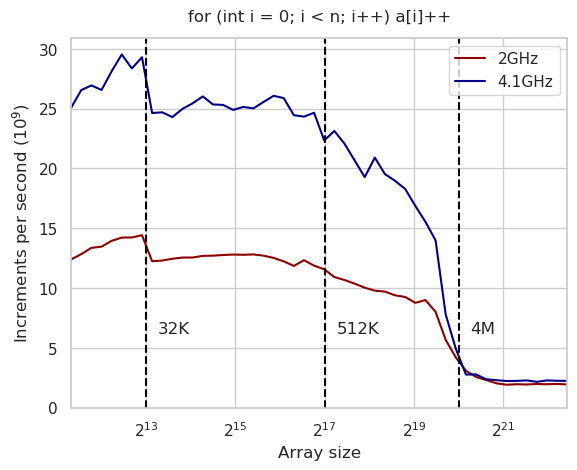

In [45]:
plt.plot(ns, inc_res, color='darkred', label='2GHz')
plt.plot(ns, inc_res_boost, color='darkblue', label='4.1GHz')
plot('for (int i = 0; i < n; i++) a[i]++', 'Increments per second ($10^9$)', 'boost.svg', 6.2, legend=True)

In [46]:
strided16_res = [bench('inc', n, 16) for n in ns]

inc 2566 16 23.31
inc 3002 16 24.08
inc 3512 16 24.88
inc 4110 16 25.87
inc 4808 16 26.08
inc 5626 16 26.59
inc 6582 16 26.54
inc 7701 16 27.31
inc 9011 16 13.51
inc 10543 16 14.88
inc 12335 16 15.03
inc 14432 16 14.99
inc 16885 16 15.16
inc 19756 16 15.37
inc 23115 16 15.44
inc 27044 16 15.37
inc 31642 16 15.45
inc 37021 16 15.44
inc 43315 16 15.58
inc 50678 16 15.62
inc 59293 16 15.61
inc 69373 16 15.23
inc 81167 16 15.57
inc 94965 16 14.83
inc 111110 16 13.72
inc 129998 16 12.95
inc 152098 16 12.53
inc 177955 16 11.64
inc 208207 16 11.08
inc 243603 16 10.52
inc 285015 16 10.13
inc 333468 16 9.84
inc 390158 16 9.57
inc 456485 16 9.46
inc 534087 16 9.41
inc 624882 16 8.8
inc 731112 16 7.99
inc 855401 16 6.98
inc 1000819 16 4.6
inc 1170959 16 3.04
inc 1370022 16 2.46
inc 1602925 16 2.11
inc 1875423 16 2.01
inc 2194245 16 1.98
inc 2567266 16 1.94
inc 3003702 16 1.75
inc 3514331 16 1.67
inc 4111767 16 1.86
inc 4810768 16 1.89
inc 5628599 16 1.92


In [47]:
strided8_res = [bench('inc', n, 8) for n in ns]

inc 2566 8 13.39
inc 3002 8 13.21
inc 3512 8 13.35
inc 4110 8 13.73
inc 4808 8 13.93
inc 5626 8 14.14
inc 6582 8 14.49
inc 7701 8 14.76
inc 9011 8 13.72
inc 10543 8 12.3
inc 12335 8 12.65
inc 14432 8 12.54
inc 16885 8 12.27
inc 19756 8 12.7
inc 23115 8 12.8
inc 27044 8 12.96
inc 31642 8 12.75
inc 37021 8 13.31
inc 43315 8 12.67
inc 50678 8 12.6
inc 59293 8 12.9
inc 69373 8 12.79
inc 81167 8 11.93
inc 94965 8 12.13
inc 111110 8 12.12
inc 129998 8 11.4
inc 152098 8 11.05
inc 177955 8 10.56
inc 208207 8 10.05
inc 243603 8 10.01
inc 285015 8 9.69
inc 333468 8 9.36
inc 390158 8 8.89
inc 456485 8 8.77
inc 534087 8 8.59
inc 624882 8 7.97
inc 731112 8 6.6
inc 855401 8 6.09
inc 1000819 8 4.35
inc 1170959 8 3.12
inc 1370022 8 2.52
inc 1602925 8 2.23
inc 1875423 8 2.24
inc 2194245 8 2.16
inc 2567266 8 2.17
inc 3003702 8 2.15
inc 3514331 8 2.12
inc 4111767 8 2.08
inc 4810768 8 2.12
inc 5628599 8 2.1


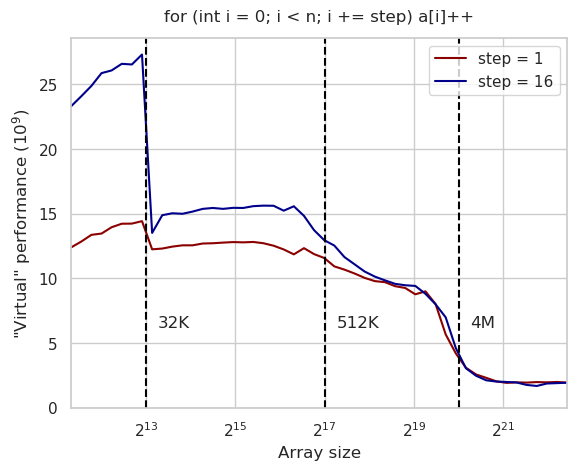

In [53]:
plt.plot(ns, inc_res, color='darkred', label='step = 1')
plt.plot(ns, strided16_res, color='darkblue', label='step = 16')
plot('for (int i = 0; i < n; i += step) a[i]++', '"Virtual" performance ($10^9$)', 'strided.svg', 6.2, legend=True)

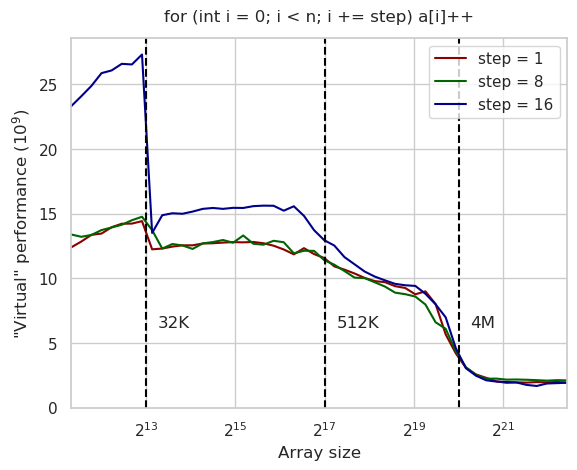

In [56]:
plt.plot(ns, inc_res, color='darkred', label='step = 1')
plt.plot(ns, strided8_res, color='darkgreen', label='step = 8')
plt.plot(ns, strided16_res, color='darkblue', label='step = 16')
plot('for (int i = 0; i < n; i += step) a[i]++', '"Virtual" performance ($10^9$)', 'strided2.svg', 6.2, legend=True)

In [61]:
ds = list(range(16, 1000))
strides_res = [bench('strides', 2**13, d) for d in ds]

strides 8192 16 0.8
strides 8192 17 0.78
strides 8192 18 0.78
strides 8192 19 0.8
strides 8192 20 0.79
strides 8192 21 0.79
strides 8192 22 0.77
strides 8192 23 0.75
strides 8192 24 0.75
strides 8192 25 0.75
strides 8192 26 0.76
strides 8192 27 0.75
strides 8192 28 0.75
strides 8192 29 0.75
strides 8192 30 0.74
strides 8192 31 0.73
strides 8192 32 0.7
strides 8192 33 0.75
strides 8192 34 0.78
strides 8192 35 0.78
strides 8192 36 0.82
strides 8192 37 0.79
strides 8192 38 0.81
strides 8192 39 0.81
strides 8192 40 0.83
strides 8192 41 0.82
strides 8192 42 0.85
strides 8192 43 0.84
strides 8192 44 0.86
strides 8192 45 0.85
strides 8192 46 0.86
strides 8192 47 0.87
strides 8192 48 0.85
strides 8192 49 0.85
strides 8192 50 0.87
strides 8192 51 0.86
strides 8192 52 0.88
strides 8192 53 0.86
strides 8192 54 0.85
strides 8192 55 0.87
strides 8192 56 0.86
strides 8192 57 0.85
strides 8192 58 0.86
strides 8192 59 0.86
strides 8192 60 0.85
strides 8192 61 0.86
strides 8192 62 0.86
strides 8192 63 

In [62]:
ds2 = list(range(1000, 1025))
strides_remaining = [bench('strides', 2**13, d) for d in ds2]

strides 8192 1000 0.15
strides 8192 1001 0.15
strides 8192 1002 0.15
strides 8192 1003 0.15
strides 8192 1004 0.15
strides 8192 1005 0.15
strides 8192 1006 0.15
strides 8192 1007 0.15
strides 8192 1008 0.15
strides 8192 1009 0.15
strides 8192 1010 0.15
strides 8192 1011 0.15
strides 8192 1012 0.15
strides 8192 1013 0.15
strides 8192 1014 0.15
strides 8192 1015 0.15
strides 8192 1016 0.15
strides 8192 1017 0.15
strides 8192 1018 0.15
strides 8192 1019 0.15
strides 8192 1020 0.15
strides 8192 1021 0.15
strides 8192 1022 0.15
strides 8192 1023 0.14
strides 8192 1024 0.04


In [63]:
# this took more than an hour to generate so I'm dumping it
import pickle

strides = strides_res + strides_remaining

with open('strides.pkl', 'wb') as f:
    pickle.dump(strides, f)

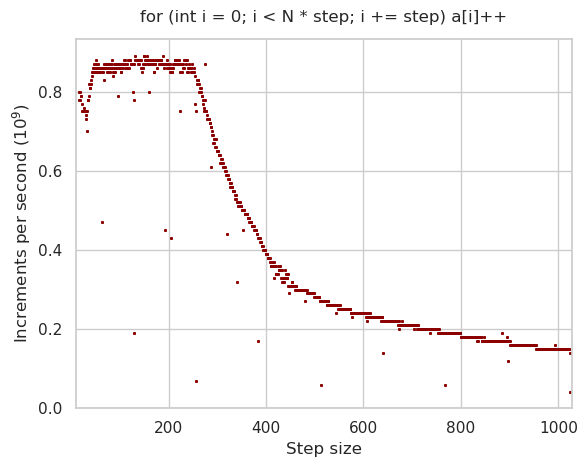

In [298]:
def plot_step(path, xlabel, normalize=True):
    #plt.scatter(x, y, color='darkred', s=s)

    if False:
        plt.grid(False)

        for x in range(16, 1025, 16):
            plt.axvline(x=x, color='lightgrey', linestyle='-')

    plt.xlabel(xlabel)
    plt.ylabel('Increments per second ($10^9$)')

    plt.title('for (int i = 0; i < N * step; i += step) a[i]++', pad=12)

    plt.ylim(bottom=0)
    plt.margins(0)

    if normalize:
        plt.xlim(left=10, right=1028)
    #plt.xscale('linear', base='256')

    fig = plt.gcf()
    fig.savefig(path)

    plt.show()

plt.scatter(ds + ds2, strides, color='darkred', s=1)
plot_step('strides.svg', 'Step size')

In [104]:
ds_two = list(range(64, 2**13 + 1, 64))
#len(ds_two)
strides_two = [bench('strides', 2**13, d) for d in ds_two]

strides 8192 64 0.4689
strides 8192 128 0.1834
strides 8192 192 0.4559
strides 8192 256 0.0674
strides 8192 320 0.4314
strides 8192 384 0.1438
strides 8192 448 0.2886
strides 8192 512 0.0509
strides 8192 576 0.2297
strides 8192 640 0.1309
strides 8192 704 0.1885
strides 8192 768 0.0491
strides 8192 832 0.1666
strides 8192 896 0.1138
strides 8192 960 0.1496
strides 8192 1024 0.0343
strides 8192 1088 0.1405
strides 8192 1152 0.0994
strides 8192 1216 0.1397
strides 8192 1280 0.0464
strides 8192 1344 0.1379
strides 8192 1408 0.1005
strides 8192 1472 0.1383
strides 8192 1536 0.045
strides 8192 1600 0.1373
strides 8192 1664 0.0873
strides 8192 1728 0.1335
strides 8192 1792 0.0451
strides 8192 1856 0.1357
strides 8192 1920 0.0867
strides 8192 1984 0.1471
strides 8192 2048 0.0373
strides 8192 2112 0.1477
strides 8192 2176 0.1013
strides 8192 2240 0.1379
strides 8192 2304 0.0496
strides 8192 2368 0.1343
strides 8192 2432 0.0934
strides 8192 2496 0.1341
strides 8192 2560 0.0478
strides 8192 2624

In [127]:
with open('strides_two.pkl', 'wb') as f:
    pickle.dump(strides_two, f)

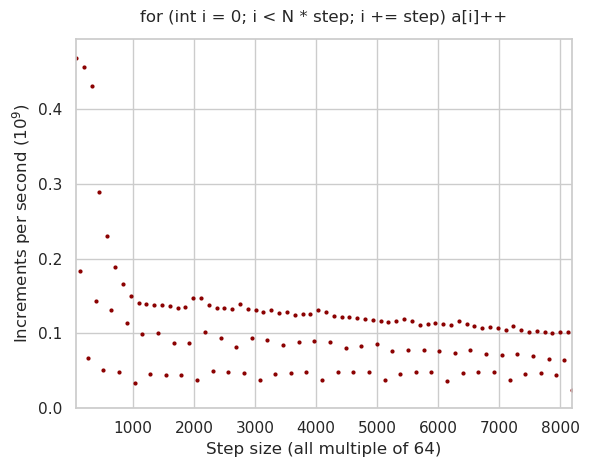

In [126]:
#plt.scatter(ds + ds2, strides, color='darkblue', s=1)
plot_step(ds_two, strides_two, 'strides_two.svg', 'Step size (all multiple of 64)', False, 4)

In [308]:
ds16 = list(range(16, 1025, 4))
strides_hugepages = [bench('strides', 2**13, d) for d in ds16]

strides 8192 16 0.8043
strides 8192 20 0.8048
strides 8192 24 0.8023
strides 8192 28 0.7423
strides 8192 32 0.6787
strides 8192 36 0.7568
strides 8192 40 0.8215
strides 8192 44 0.8366
strides 8192 48 0.8414
strides 8192 52 0.8548
strides 8192 56 0.8711
strides 8192 60 0.8343
strides 8192 64 0.4655
strides 8192 68 0.8388
strides 8192 72 0.8375
strides 8192 76 0.8774
strides 8192 80 0.8455
strides 8192 84 0.8752
strides 8192 88 0.8409
strides 8192 92 0.8735
strides 8192 96 0.785
strides 8192 100 0.8878
strides 8192 104 0.8776
strides 8192 108 0.8563
strides 8192 112 0.8479
strides 8192 116 0.8619
strides 8192 120 0.8732
strides 8192 124 0.8882
strides 8192 128 0.1931
strides 8192 132 0.8673
strides 8192 136 0.874
strides 8192 140 0.8478
strides 8192 144 0.837
strides 8192 148 0.8471
strides 8192 152 0.8882
strides 8192 156 0.8739
strides 8192 160 0.7719
strides 8192 164 0.8837
strides 8192 168 0.8698
strides 8192 172 0.8675
strides 8192 176 0.8606
strides 8192 180 0.8963
strides 8192 184

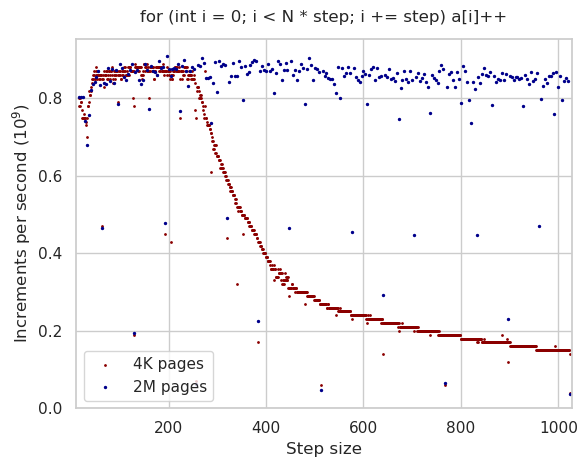

In [312]:
plt.scatter(ds + ds2, strides, color='darkred', s=1, label='4K pages')
plt.scatter(ds16, strides_hugepages, color='darkblue', s=2, label='2M pages')
plt.legend(loc='best')
plot_step('strides-hugepages.svg', 'Step size')

In [1]:
ns = list(int(1.17**k) for k in range(50, 100))
p = [bench('permutation', n) for n in ns]

NameError: name 'bench' is not defined

In [6]:
p_boost = [bench('permutation', n) for n in ns]

permutation 2566 1 1.65
permutation 3002 1 1.57
permutation 3512 1 1.72
permutation 4110 1 1.76
permutation 4808 1 1.59
permutation 5626 1 1.77
permutation 6582 1 1.44
permutation 7701 1 1.73
permutation 9011 1 1.64
permutation 10543 1 2.24
permutation 12335 1 2.47
permutation 14432 1 2.61
permutation 16885 1 3.08
permutation 19756 1 2.78
permutation 23115 1 2.99
permutation 27044 1 2.9
permutation 31642 1 2.98
permutation 37021 1 3.27
permutation 43315 1 3.26
permutation 50678 1 3.16
permutation 59293 1 4.01
permutation 69373 1 3.42
permutation 81167 1 4.1
permutation 94965 1 4.16
permutation 111110 1 5.28
permutation 129998 1 6.49
permutation 152098 1 6.55
permutation 177955 1 8.11
permutation 208207 1 9.02
permutation 243603 1 11.39
permutation 285015 1 14.09
permutation 333468 1 13.97
permutation 390158 1 14.98
permutation 456485 1 18.91
permutation 534087 1 18.42
permutation 624882 1 27.16
permutation 731112 1 26.01
permutation 855401 1 36.2
permutation 1000819 1 47.47
permutation

In [13]:
p_boost_hugepages = [bench('permutation', n) for n in ns]

permutation 2566 1 1.78
permutation 3002 1 1.44
permutation 3512 1 1.71
permutation 4110 1 1.71
permutation 4808 1 1.71
permutation 5626 1 1.59
permutation 6582 1 1.44
permutation 7701 1 2.11
permutation 9011 1 1.65
permutation 10543 1 2.19
permutation 12335 1 2.26
permutation 14432 1 2.56
permutation 16885 1 2.79
permutation 19756 1 2.92
permutation 23115 1 2.92
permutation 27044 1 3.48
permutation 31642 1 3.13
permutation 37021 1 3.26
permutation 43315 1 3.17
permutation 50678 1 3.26
permutation 59293 1 3.21
permutation 69373 1 3.59
permutation 81167 1 3.95
permutation 94965 1 4.15
permutation 111110 1 4.56
permutation 129998 1 5.31
permutation 152098 1 6.15
permutation 177955 1 7.52
permutation 208207 1 8.95
permutation 243603 1 10.39
permutation 285015 1 11.48
permutation 333468 1 13.04
permutation 390158 1 12.23
permutation 456485 1 18.04
permutation 534087 1 21.22
permutation 624882 1 25.53
permutation 731112 1 32.5
permutation 855401 1 36.33
permutation 1000819 1 40.99
permutati

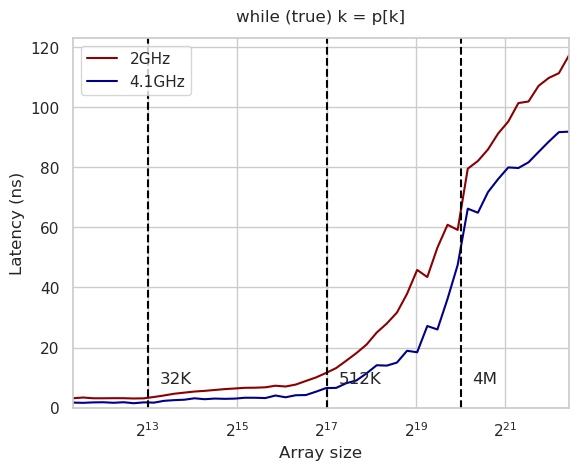

In [15]:
plt.plot(ns, p, color='darkred', label='2GHz')
plt.plot(ns, p_boost, color='darkblue', label='4.1GHz')
#plt.plot(ns, p_boost_hugepages, color='darkgreen', label='4.1GHz with huge pages')
plot('while (true) k = p[k]', 'Latency (ns)', 'permutation-boost.svg', 8, legend=True)

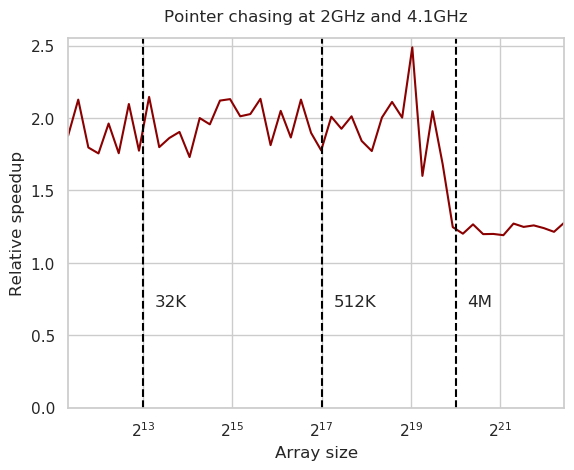

In [25]:
plt.plot(ns, [x / y for x, y in zip(p, p_boost)], color='darkred')
plot('Pointer chasing at 2GHz and 4.1GHz', 'Relative speedup', 'permutation-boost-speedup.svg', 0.7)

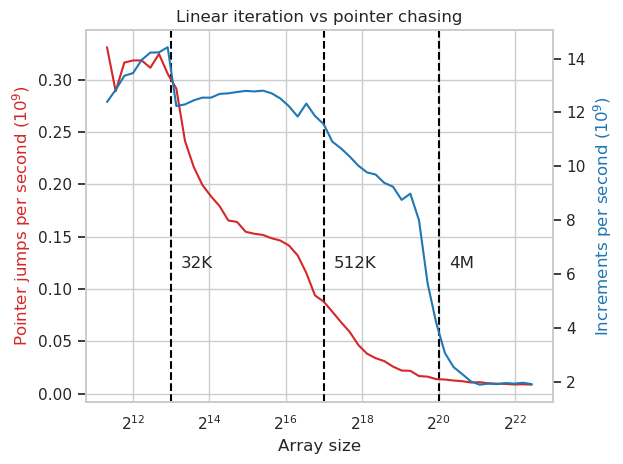

In [147]:
fig, ax1 = plt.subplots()

lines = [
    (2**13, "32K"),
    (2**17, "512K"),
    (2**20, "4M"),
]

for x, t in lines:
    ax1.text(x * 1.2, 0.12, t)
    ax1.axvline(x=x, color='black', linestyle='--')

plt.title('Linear iteration vs pointer chasing')

color = 'tab:red'
ax1.set_xlabel('Array size')
ax1.set_ylabel('Pointer jumps per second ($10^9$)', color=color)
ax1.plot(ns, [1 / x for x in p], color=color)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Increments per second ($10^9$)', color=color)
ax2.plot(ns, inc_res, color=color)
#ax2.tick_params(axis='y', labelcolor=color)

ax2.grid(False)

plt.xscale('log', basex=2)

#plt.ylim(bottom=0)
#plt.margins(0)

fig.tight_layout()
fig.savefig('latency-throughput.svg')

plt.show()

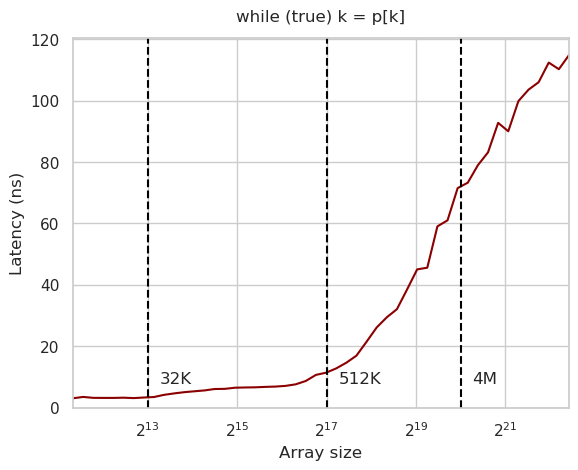

In [203]:
plt.plot(ns, p, color='darkred')
plot('while (true) k = p[k]', 'Latency (ns)', 'permutation-latency.svg', 8)

In [290]:
bench('permutation', n=2**25)

permutation 33554432 1 140.89


140.89

In [263]:
bench('permutation', n=2**25)
# reaches 180 at 0.5G RAM

permutation 33554432 1 145.32


145.32

In [189]:
p64 = [bench('permutation-pointers', n) for n in ns]

permutation-pointers 2566 1 2.01
permutation-pointers 3002 1 2.09
permutation-pointers 3512 1 2.09
permutation-pointers 4110 1 2.18
permutation-pointers 4808 1 2.75
permutation-pointers 5626 1 3.3
permutation-pointers 6582 1 3.71
permutation-pointers 7701 1 4.09
permutation-pointers 9011 1 4.52
permutation-pointers 10543 1 4.72
permutation-pointers 12335 1 5.0
permutation-pointers 14432 1 5.16
permutation-pointers 16885 1 5.39
permutation-pointers 19756 1 5.51
permutation-pointers 23115 1 5.5
permutation-pointers 27044 1 5.74
permutation-pointers 31642 1 5.61
permutation-pointers 37021 1 6.32
permutation-pointers 43315 1 6.88
permutation-pointers 50678 1 8.1
permutation-pointers 59293 1 9.34
permutation-pointers 69373 1 11.89
permutation-pointers 81167 1 13.61
permutation-pointers 94965 1 16.84
permutation-pointers 111110 1 19.75
permutation-pointers 129998 1 21.55
permutation-pointers 152098 1 26.63
permutation-pointers 177955 1 30.23
permutation-pointers 208207 1 34.91
permutation-po

In [190]:
p32 = [bench('permutation-pointers', n, mode='-m32') for n in ns]

permutation-pointers 2566 1 2.01
permutation-pointers 3002 1 2.16
permutation-pointers 3512 1 2.15
permutation-pointers 4110 1 2.15
permutation-pointers 4808 1 2.1
permutation-pointers 5626 1 2.01
permutation-pointers 6582 1 2.13
permutation-pointers 7701 1 2.01
permutation-pointers 9011 1 2.43
permutation-pointers 10543 1 3.39
permutation-pointers 12335 1 3.6
permutation-pointers 14432 1 4.0
permutation-pointers 16885 1 4.33
permutation-pointers 19756 1 4.6
permutation-pointers 23115 1 4.81
permutation-pointers 27044 1 5.05
permutation-pointers 31642 1 5.29
permutation-pointers 37021 1 5.37
permutation-pointers 43315 1 5.52
permutation-pointers 50678 1 5.48
permutation-pointers 59293 1 5.69
permutation-pointers 69373 1 6.27
permutation-pointers 81167 1 6.62
permutation-pointers 94965 1 7.36
permutation-pointers 111110 1 9.3
permutation-pointers 129998 1 10.77
permutation-pointers 152098 1 12.33
permutation-pointers 177955 1 14.74
permutation-pointers 208207 1 17.62
permutation-pointer

In [191]:
bf = [bench('permutation-bitfield', n) for n in ns]

permutation-bitfield 2566 1 6.8
permutation-bitfield 3002 1 6.76
permutation-bitfield 3512 1 6.54
permutation-bitfield 4110 1 6.83
permutation-bitfield 4808 1 6.78
permutation-bitfield 5626 1 6.79
permutation-bitfield 6582 1 6.7
permutation-bitfield 7701 1 6.64
permutation-bitfield 9011 1 6.56
permutation-bitfield 10543 1 6.59
permutation-bitfield 12335 1 7.17
permutation-bitfield 14432 1 7.61
permutation-bitfield 16885 1 8.15
permutation-bitfield 19756 1 8.57
permutation-bitfield 23115 1 8.85
permutation-bitfield 27044 1 9.31
permutation-bitfield 31642 1 9.43
permutation-bitfield 37021 1 9.73
permutation-bitfield 43315 1 9.96
permutation-bitfield 50678 1 9.99
permutation-bitfield 59293 1 10.17
permutation-bitfield 69373 1 10.38
permutation-bitfield 81167 1 10.43
permutation-bitfield 94965 1 10.85
permutation-bitfield 111110 1 12.46
permutation-bitfield 129998 1 13.07
permutation-bitfield 152098 1 14.57
permutation-bitfield 177955 1 16.23
permutation-bitfield 208207 1 17.67
permutation

In [192]:
bf2 = [bench('permutation-bitfield2', n) for n in ns]

permutation-bitfield2 2566 1 4.47
permutation-bitfield2 3002 1 4.17
permutation-bitfield2 3512 1 4.24
permutation-bitfield2 4110 1 4.22
permutation-bitfield2 4808 1 4.07
permutation-bitfield2 5626 1 4.05
permutation-bitfield2 6582 1 4.15
permutation-bitfield2 7701 1 4.1
permutation-bitfield2 9011 1 4.22
permutation-bitfield2 10543 1 4.22
permutation-bitfield2 12335 1 4.7
permutation-bitfield2 14432 1 5.12
permutation-bitfield2 16885 1 5.74
permutation-bitfield2 19756 1 6.11
permutation-bitfield2 23115 1 6.49
permutation-bitfield2 27044 1 6.81
permutation-bitfield2 31642 1 7.14
permutation-bitfield2 37021 1 7.21
permutation-bitfield2 43315 1 7.35
permutation-bitfield2 50678 1 7.49
permutation-bitfield2 59293 1 7.6
permutation-bitfield2 69373 1 7.66
permutation-bitfield2 81167 1 7.68
permutation-bitfield2 94965 1 8.13
permutation-bitfield2 111110 1 8.83
permutation-bitfield2 129998 1 9.75
permutation-bitfield2 152098 1 10.71
permutation-bitfield2 177955 1 13.14
permutation-bitfield2 2082

In [188]:
bench('permutation', n=2**20)
bench('permutation-pointers', n=2**20)
bench('permutation-pointers', n=2**20, mode='-m32')
bench('permutation-bitfield', n=2**20)
bench('permutation-bitfield2', n=2**20)

permutation 1048576 1 72.26
permutation-pointers 1048576 1 95.76
permutation-pointers 1048576 1 74.04
permutation-bitfield 1048576 1 63.61
permutation-bitfield2 1048576 1 56.02


56.02

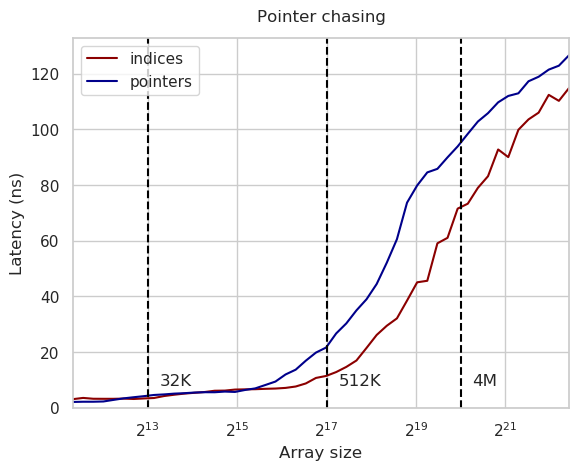

In [205]:
plt.plot(ns, p, color='darkred', label='indices')
plt.plot(ns, p64, color='darkblue', label='pointers')
plot('Pointer chasing', 'Latency (ns)', 'permutation-p64.svg', 8, legend=True)

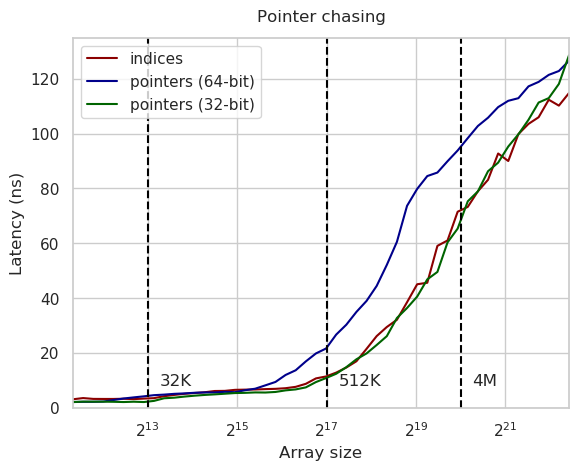

In [213]:
plt.plot(ns, p, color='darkred', label='indices')
plt.plot(ns, p64, color='darkblue', label='pointers (64-bit)')
plt.plot(ns, p32, color='darkgreen', label='pointers (32-bit)')
plot('Pointer chasing', 'Latency (ns)', 'permutation-p32.svg', 8, legend=True)

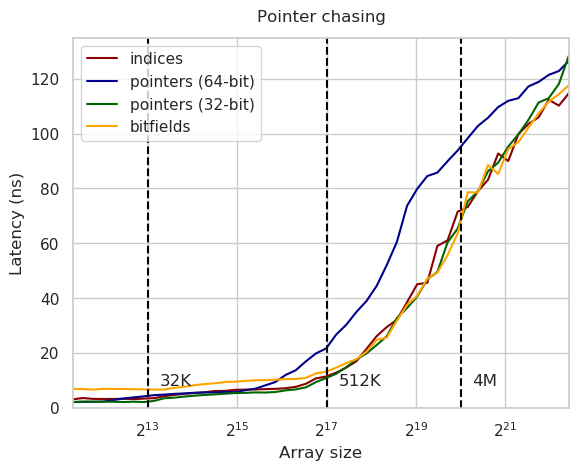

In [215]:
plt.plot(ns, p, color='darkred', label='indices')
plt.plot(ns, p64, color='darkblue', label='pointers (64-bit)')
plt.plot(ns, p32, color='darkgreen', label='pointers (32-bit)')
plt.plot(ns, bf, color='orange', label='bitfields')
plot('Pointer chasing', 'Latency (ns)', 'permutation-bf.svg', 8, legend=True)

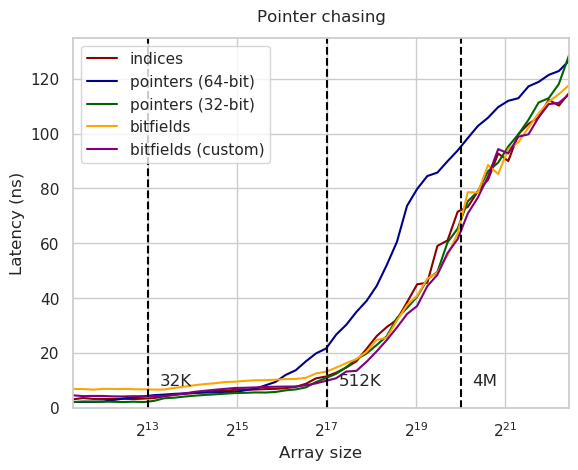

In [216]:
plt.plot(ns, p, color='darkred', label='indices')
plt.plot(ns, p64, color='darkblue', label='pointers (64-bit)')
plt.plot(ns, p32, color='darkgreen', label='pointers (32-bit)')
plt.plot(ns, bf, color='orange', label='bitfields')
plt.plot(ns, bf2, color='purple', label='bitfields (custom)')
plot('Pointer chasing', 'Latency (ns)', 'permutation-bf-custom.svg', 8, legend=True)

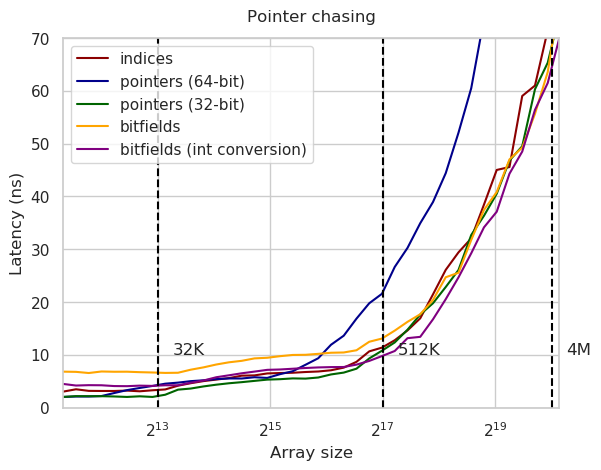

In [252]:
#lim = 30
plt.plot(ns, p, color='darkred', label='indices')
plt.plot(ns, p64, color='darkblue', label='pointers (64-bit)')
plt.plot(ns, p32, color='darkgreen', label='pointers (32-bit)')
plt.plot(ns, bf, color='orange', label='bitfields')
plt.plot(ns, bf2, color='purple', label='bitfields (int conversion)')
plt.xlim(left=ns[0], right=2**20 * 1.1)
plot('Pointer chasing', 'Latency (ns)', 'permutation-final-zoom.svg', 10, legend=True, ylim=70)

In [264]:
hw = [bench('hw-prefetch', n) for n in ns]

hw-prefetch 2566 1 3.06
hw-prefetch 3002 1 3.02
hw-prefetch 3512 1 3.02
hw-prefetch 4110 1 3.09
hw-prefetch 4808 1 3.15
hw-prefetch 5626 1 3.04
hw-prefetch 6582 1 3.13
hw-prefetch 7701 1 3.17
hw-prefetch 9011 1 3.2
hw-prefetch 10543 1 3.02
hw-prefetch 12335 1 3.07
hw-prefetch 14432 1 3.05
hw-prefetch 16885 1 3.13
hw-prefetch 19756 1 3.16
hw-prefetch 23115 1 3.15
hw-prefetch 27044 1 3.02
hw-prefetch 31642 1 3.14
hw-prefetch 37021 1 3.06
hw-prefetch 43315 1 3.12
hw-prefetch 50678 1 3.02
hw-prefetch 59293 1 3.03
hw-prefetch 69373 1 3.03
hw-prefetch 81167 1 3.01
hw-prefetch 94965 1 3.14
hw-prefetch 111110 1 3.1
hw-prefetch 129998 1 3.1
hw-prefetch 152098 1 3.11
hw-prefetch 177955 1 3.07
hw-prefetch 208207 1 3.2
hw-prefetch 243603 1 3.08
hw-prefetch 285015 1 3.02
hw-prefetch 333468 1 3.08
hw-prefetch 390158 1 3.08
hw-prefetch 456485 1 3.05
hw-prefetch 534087 1 3.05
hw-prefetch 624882 1 3.03
hw-prefetch 731112 1 3.03
hw-prefetch 855401 1 3.02
hw-prefetch 1000819 1 3.03
hw-prefetch 1170959 1 

In [266]:
sw = [bench('sw-prefetch', n) for n in ns]

sw-prefetch 2566 1 7.11
sw-prefetch 3002 1 7.11
sw-prefetch 3512 1 7.08
sw-prefetch 4110 1 7.02
sw-prefetch 4808 1 7.04
sw-prefetch 5626 1 7.21
sw-prefetch 6582 1 7.03
sw-prefetch 7701 1 7.14
sw-prefetch 9011 1 7.12
sw-prefetch 10543 1 7.03
sw-prefetch 12335 1 7.16
sw-prefetch 14432 1 7.18
sw-prefetch 16885 1 7.17
sw-prefetch 19756 1 7.23
sw-prefetch 23115 1 7.2
sw-prefetch 27044 1 7.13
sw-prefetch 31642 1 7.13
sw-prefetch 37021 1 7.17
sw-prefetch 43315 1 7.41
sw-prefetch 50678 1 7.24
sw-prefetch 59293 1 7.3
sw-prefetch 69373 1 7.19
sw-prefetch 81167 1 8.22
sw-prefetch 94965 1 7.99
sw-prefetch 111110 1 9.43
sw-prefetch 129998 1 9.4
sw-prefetch 152098 1 11.28
sw-prefetch 177955 1 10.37
sw-prefetch 208207 1 12.03
sw-prefetch 243603 1 14.9
sw-prefetch 285015 1 17.0
sw-prefetch 333468 1 10.87
sw-prefetch 390158 1 11.31
sw-prefetch 456485 1 21.96
sw-prefetch 534087 1 26.09
sw-prefetch 624882 1 29.71
sw-prefetch 731112 1 39.96
sw-prefetch 855401 1 32.61
sw-prefetch 1000819 1 40.78
sw-prefetc

In [267]:
sw2 = [bench('sw-prefetch', n, 2) for n in ns]
sw3 = [bench('sw-prefetch', n, 3) for n in ns]
sw4 = [bench('sw-prefetch', n, 4) for n in ns]
sw8 = [bench('sw-prefetch', n, 8) for n in ns]

sw-prefetch 2566 2 7.3
sw-prefetch 3002 2 7.3
sw-prefetch 3512 2 7.44
sw-prefetch 4110 2 7.14
sw-prefetch 4808 2 7.24
sw-prefetch 5626 2 7.22
sw-prefetch 6582 2 7.37
sw-prefetch 7701 2 7.26
sw-prefetch 9011 2 7.08
sw-prefetch 10543 2 7.15
sw-prefetch 12335 2 7.28
sw-prefetch 14432 2 7.39
sw-prefetch 16885 2 7.19
sw-prefetch 19756 2 7.3
sw-prefetch 23115 2 7.38
sw-prefetch 27044 2 7.38
sw-prefetch 31642 2 7.4
sw-prefetch 37021 2 7.21
sw-prefetch 43315 2 7.29
sw-prefetch 50678 2 7.42
sw-prefetch 59293 2 7.28
sw-prefetch 69373 2 7.27
sw-prefetch 81167 2 7.55
sw-prefetch 94965 2 7.49
sw-prefetch 111110 2 7.85
sw-prefetch 129998 2 8.06
sw-prefetch 152098 2 9.11
sw-prefetch 177955 2 9.35
sw-prefetch 208207 2 10.22
sw-prefetch 243603 2 13.11
sw-prefetch 285015 2 12.62
sw-prefetch 333468 2 9.41
sw-prefetch 390158 2 9.21
sw-prefetch 456485 2 15.74
sw-prefetch 534087 2 18.15
sw-prefetch 624882 2 18.08
sw-prefetch 731112 2 19.8
sw-prefetch 855401 2 23.45
sw-prefetch 1000819 2 29.11
sw-prefetch 11

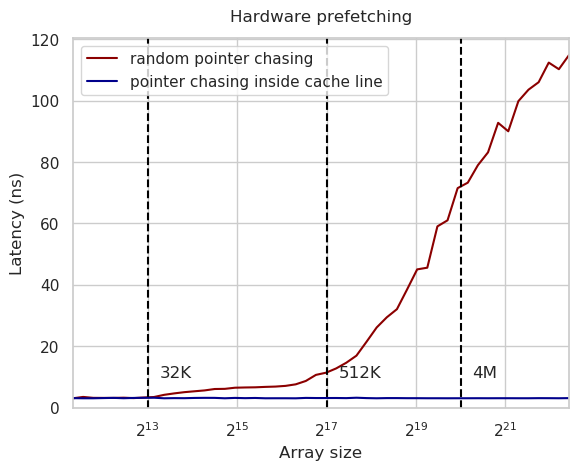

In [268]:
plt.plot(ns, p, color='darkred', label='random pointer chasing')
plt.plot(ns, hw, color='darkblue', label='pointer chasing inside cache line')
plot('Hardware prefetching', 'Latency (ns)', 'sw-prefetch.svg', 10, legend=True)

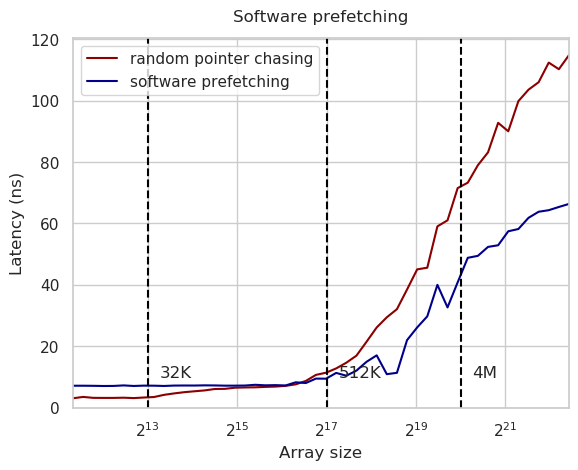

In [295]:
plt.plot(ns, p, color='darkred', label='random pointer chasing')
plt.plot(ns, sw, color='darkblue', label='software prefetching')
plot('Software prefetching', 'Latency (ns)', 'sw-prefetch.svg', 10, legend=True)

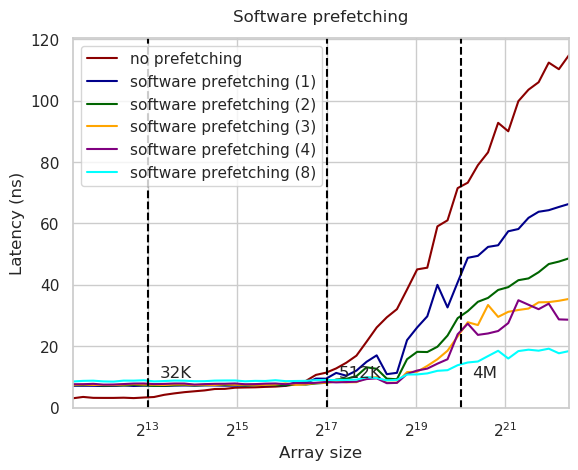

In [294]:
plt.plot(ns, p, color='darkred', label='no prefetching')
plt.plot(ns, sw, color='darkblue', label='software prefetching (1)')
plt.plot(ns, sw2, color='darkgreen', label='software prefetching (2)')
plt.plot(ns, sw3, color='orange', label='software prefetching (3)')
plt.plot(ns, sw4, color='purple', label='software prefetching (4)')
plt.plot(ns, sw8, color='cyan', label='software prefetching (8)')
plot('Software prefetching', 'Latency (ns)', 'sw-prefetch-others.svg', 10, legend=True)

In [287]:
bench('strides', n=2**13, d=123)
bench('hugepages', n=2**13, d=123)

strides 8192 123 0.8637
hugepages 8192 123 0.8579


0.8579

In [143]:
def bench_parallel(n, p, source='inc', d=1):
    !g++ -std=c++17 -O3 -march=native -D N={n} -D D={d} {source}.cc -o run
    p = list(map(str, p))
    res = !parallel taskset -c {','.join(p)} ./run ::: {' '.join(p)}
    print(res)
    res = float(res[0].split()[0])
    print(n, ''.join(p), res)
    return res

In [132]:
bench_parallel(2**24, [0, 1], 'sum')

['2.51 GFLOPS', '1106931644', '2.51 GFLOPS', '1106931644']
16777216 01 2.51


2.51

In [155]:
1.38*8

3.6

In [154]:
bench_parallel(2**22, [0, 1, 2, 3, 4, 5, 6, 7], 'inc', d=16)

['0.44 GFLOPS', '0.45 GFLOPS', '0.43 GFLOPS', '0.44 GFLOPS', '0.45 GFLOPS', '0.43 GFLOPS', '0.42 GFLOPS', '0.45 GFLOPS']
4194304 01234567 0.44


0.44

In [156]:
8*2*2.666

42.656

In [367]:
par2 = [bench_parallel(n, [0, 1]) for n in ns]

['12.30 GFLOPS', '12.28 GFLOPS']
2566 01 12.3
['12.95 GFLOPS', '12.95 GFLOPS']
3002 01 12.95
['13.27 GFLOPS', '13.29 GFLOPS']
3512 01 13.27
['13.40 GFLOPS', '13.35 GFLOPS']
4110 01 13.4
['13.87 GFLOPS', '13.83 GFLOPS']
4808 01 13.87
['14.14 GFLOPS', '14.13 GFLOPS']
5626 01 14.14
['14.27 GFLOPS', '14.33 GFLOPS']
6582 01 14.27
['14.56 GFLOPS', '14.53 GFLOPS']
7701 01 14.56
['12.23 GFLOPS', '12.34 GFLOPS']
9011 01 12.23
['13.10 GFLOPS', '12.86 GFLOPS']
10543 01 13.1
['12.41 GFLOPS', '12.34 GFLOPS']
12335 01 12.41
['12.53 GFLOPS', '12.54 GFLOPS']
14432 01 12.53
['12.57 GFLOPS', '12.56 GFLOPS']
16885 01 12.57
['12.61 GFLOPS', '12.60 GFLOPS']
19756 01 12.61
['12.68 GFLOPS', '12.72 GFLOPS']
23115 01 12.68
['12.78 GFLOPS', '12.75 GFLOPS']
27044 01 12.78
['12.78 GFLOPS', '12.77 GFLOPS']
31642 01 12.78
['12.83 GFLOPS', '12.78 GFLOPS']
37021 01 12.83
['12.90 GFLOPS', '12.79 GFLOPS']
43315 01 12.9
['12.91 GFLOPS', '12.79 GFLOPS']
50678 01 12.91
['12.89 GFLOPS', '12.84 GFLOPS']
59293 01 12.89
['12.

In [368]:
par2_affinity = [bench_parallel(n, [0, 4]) for n in ns]

['12.33 GFLOPS', '12.28 GFLOPS']
2566 04 12.33
['12.96 GFLOPS', '13.01 GFLOPS']
3002 04 12.96
['13.22 GFLOPS', '13.36 GFLOPS']
3512 04 13.22
['13.43 GFLOPS', '13.29 GFLOPS']
4110 04 13.43
['13.86 GFLOPS', '13.87 GFLOPS']
4808 04 13.86
['14.03 GFLOPS', '14.17 GFLOPS']
5626 04 14.03
['14.24 GFLOPS', '14.25 GFLOPS']
6582 04 14.24
['14.60 GFLOPS', '14.69 GFLOPS']
7701 04 14.6
['12.26 GFLOPS', '12.28 GFLOPS']
9011 04 12.26
['12.35 GFLOPS', '12.36 GFLOPS']
10543 04 12.35
['12.42 GFLOPS', '12.40 GFLOPS']
12335 04 12.42
['12.55 GFLOPS', '12.46 GFLOPS']
14432 04 12.55
['12.57 GFLOPS', '12.52 GFLOPS']
16885 04 12.57
['12.62 GFLOPS', '12.59 GFLOPS']
19756 04 12.62
['12.64 GFLOPS', '12.66 GFLOPS']
23115 04 12.64
['12.73 GFLOPS', '12.73 GFLOPS']
27044 04 12.73
['12.78 GFLOPS', '12.79 GFLOPS']
31642 04 12.78
['12.85 GFLOPS', '12.73 GFLOPS']
37021 04 12.85
['12.89 GFLOPS', '12.88 GFLOPS']
43315 04 12.89
['12.89 GFLOPS', '12.89 GFLOPS']
50678 04 12.89
['12.91 GFLOPS', '12.62 GFLOPS']
59293 04 12.91
['

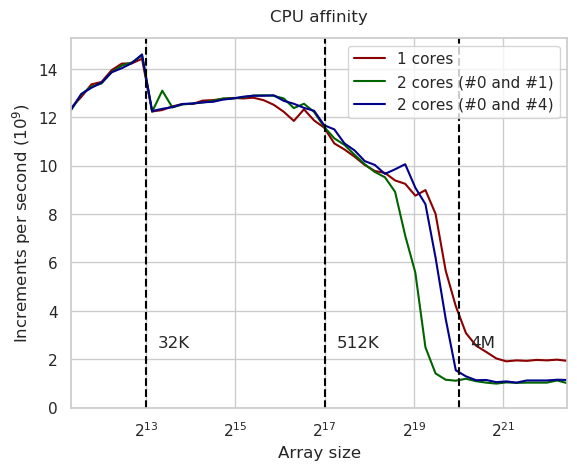

In [378]:
plt.plot(ns, inc_res, color='darkred', label='1 cores')
plt.plot(ns, par2, color='darkgreen', label='2 cores (#0 and #1)')
plt.plot(ns, par2_affinity, color='darkblue', label='2 cores (#0 and #4)')
plot('CPU affinity', 'Increments per second ($10^9$)', path='affinity.svg', ch=2.5, legend=True)

In [370]:
par3 = [bench_parallel(n, [0, 1, 2]) for n in ns]
par4 = [bench_parallel(n, [0, 1, 2, 3]) for n in ns]

['12.41 GFLOPS', '12.34 GFLOPS', '12.26 GFLOPS']
2566 012 12.41
['12.98 GFLOPS', '13.02 GFLOPS', '13.01 GFLOPS']
3002 012 12.98
['13.37 GFLOPS', '13.26 GFLOPS', '13.26 GFLOPS']
3512 012 13.37
['13.29 GFLOPS', '13.32 GFLOPS', '13.46 GFLOPS']
4110 012 13.29
['13.94 GFLOPS', '13.82 GFLOPS', '13.95 GFLOPS']
4808 012 13.94
['14.22 GFLOPS', '14.20 GFLOPS', '14.21 GFLOPS']
5626 012 14.22
['14.32 GFLOPS', '14.23 GFLOPS', '14.16 GFLOPS']
6582 012 14.32
['14.60 GFLOPS', '14.65 GFLOPS', '14.61 GFLOPS']
7701 012 14.6
['12.25 GFLOPS', '12.27 GFLOPS', '12.27 GFLOPS']
9011 012 12.25
['12.27 GFLOPS', '12.33 GFLOPS', '12.28 GFLOPS']
10543 012 12.27
['12.44 GFLOPS', '12.41 GFLOPS', '12.37 GFLOPS']
12335 012 12.44
['12.47 GFLOPS', '12.48 GFLOPS', '12.47 GFLOPS']
14432 012 12.47
['12.61 GFLOPS', '12.58 GFLOPS', '12.62 GFLOPS']
16885 012 12.61
['12.61 GFLOPS', '12.66 GFLOPS', '12.64 GFLOPS']
19756 012 12.61
['12.64 GFLOPS', '12.69 GFLOPS', '12.70 GFLOPS']
23115 012 12.64
['12.79 GFLOPS', '12.80 GFLOPS', '1

In [371]:
inc_res_boost

[25.09,
 26.56,
 26.95,
 26.57,
 28.13,
 29.54,
 28.37,
 29.31,
 24.64,
 24.7,
 24.3,
 24.99,
 25.45,
 26.03,
 25.36,
 25.32,
 24.9,
 25.15,
 25.03,
 25.56,
 26.08,
 25.89,
 24.46,
 24.34,
 24.66,
 22.35,
 23.14,
 22.08,
 20.68,
 19.28,
 20.91,
 19.53,
 18.97,
 18.29,
 16.87,
 15.54,
 13.99,
 7.79,
 4.92,
 2.76,
 2.77,
 2.37,
 2.29,
 2.22,
 2.23,
 2.27,
 2.15,
 2.27,
 2.24,
 2.23]

In [380]:
par2_boost = [bench_parallel(n, [0, 1]) for n in ns]
par3_boost  = [bench_parallel(n, [0, 1, 2]) for n in ns]
par4_boost  = [bench_parallel(n, [0, 1, 2, 3]) for n in ns]

['25.02 GFLOPS', '25.02 GFLOPS']
2566 01 25.02
['26.36 GFLOPS', '26.55 GFLOPS']
3002 01 26.36
['27.08 GFLOPS', '27.34 GFLOPS']
3512 01 27.08
['27.61 GFLOPS', '27.42 GFLOPS']
4110 01 27.61
['28.67 GFLOPS', '28.13 GFLOPS']
4808 01 28.67
['28.53 GFLOPS', '28.67 GFLOPS']
5626 01 28.53
['28.62 GFLOPS', '29.00 GFLOPS']
6582 01 28.62
['30.36 GFLOPS', '29.22 GFLOPS']
7701 01 30.36
['24.71 GFLOPS', '24.85 GFLOPS']
9011 01 24.71
['25.00 GFLOPS', '24.50 GFLOPS']
10543 01 25.0
['22.97 GFLOPS', '23.02 GFLOPS']
12335 01 22.97
['25.33 GFLOPS', '25.34 GFLOPS']
14432 01 25.33
['25.46 GFLOPS', '25.44 GFLOPS']
16885 01 25.46
['25.46 GFLOPS', '25.60 GFLOPS']
19756 01 25.46
['25.80 GFLOPS', '25.30 GFLOPS']
23115 01 25.8
['25.73 GFLOPS', '25.83 GFLOPS']
27044 01 25.73
['25.05 GFLOPS', '26.07 GFLOPS']
31642 01 25.05
['25.81 GFLOPS', '25.29 GFLOPS']
37021 01 25.81
['25.94 GFLOPS', '25.76 GFLOPS']
43315 01 25.94
['25.70 GFLOPS', '25.68 GFLOPS']
50678 01 25.7
['26.04 GFLOPS', '25.78 GFLOPS']
59293 01 26.04
['24

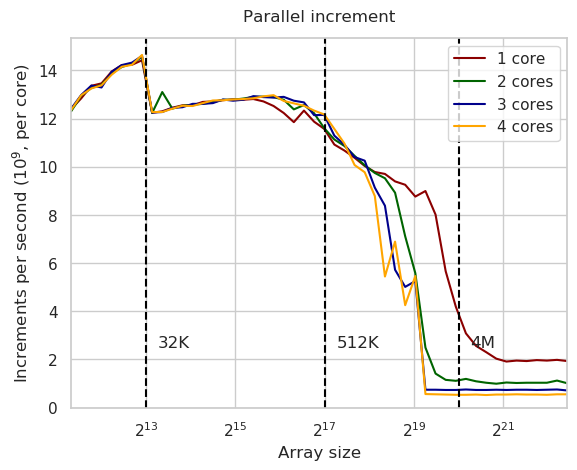

In [375]:
plt.plot(ns, inc_res, color='darkred', label='1 core')
plt.plot(ns, par2, color='darkgreen', label='2 cores')
plt.plot(ns, par3, color='darkblue', label='3 cores')
plt.plot(ns, par4, color='orange', label='4 cores')
plot('Parallel increment', 'Increments per second ($10^9$, per core)', path='parallel.svg', ch=2.5, legend=True)

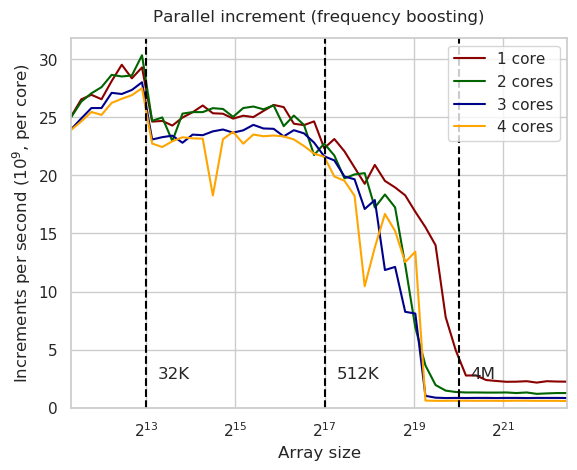

In [381]:
plt.plot(ns, inc_res_boost, color='darkred', label='1 core')
plt.plot(ns, par2_boost, color='darkgreen', label='2 cores')
plt.plot(ns, par3_boost, color='darkblue', label='3 cores')
plt.plot(ns, par4_boost, color='orange', label='4 cores')
plot('Parallel increment (frequency boosting)', 'Increments per second ($10^9$, per core)', path='parallel-boost.svg', ch=2.5, legend=True)

In [383]:
bench_parallel(2**21, [0, 1])

['1.20 GFLOPS', '1.20 GFLOPS']
2097152 01 1.2


1.2

In [417]:
bench('inc', 1024*2048, 1024)
bench('inc', 1024*1024*300, 1024)

inc 2097152 1024 34.67
inc 314572800 1024 14.71


14.71

In [6]:
p1 = [bench('permutation', n) for n in ns]

permutation 2566 1 3.09
permutation 3002 1 3.06
permutation 3512 1 3.08
permutation 4110 1 3.11
permutation 4808 1 3.02
permutation 5626 1 3.02
permutation 6582 1 3.06
permutation 7701 1 3.21
permutation 9011 1 3.56
permutation 10543 1 4.06
permutation 12335 1 4.56
permutation 14432 1 5.03
permutation 16885 1 5.37
permutation 19756 1 5.68
permutation 23115 1 5.83
permutation 27044 1 6.18
permutation 31642 1 6.27
permutation 37021 1 6.42
permutation 43315 1 6.61
permutation 50678 1 6.56
permutation 59293 1 6.72
permutation 69373 1 6.92
permutation 81167 1 7.85
permutation 94965 1 8.38
permutation 111110 1 11.29
permutation 129998 1 11.02
permutation 152098 1 13.14
permutation 177955 1 15.64
permutation 208207 1 18.41
permutation 243603 1 22.99
permutation 285015 1 25.51
permutation 333468 1 28.54
permutation 390158 1 35.46
permutation 456485 1 37.99
permutation 534087 1 45.77
permutation 624882 1 60.18
permutation 731112 1 60.32
permutation 855401 1 66.21
permutation 1000819 1 72.12
per

In [7]:
p2 = [bench('permutation2', n) for n in ns]

permutation2 2566 1 3.52
permutation2 3002 1 4.0
permutation2 3512 1 3.61
permutation2 4110 1 4.13
permutation2 4808 1 4.78
permutation2 5626 1 5.78
permutation2 6582 1 6.4
permutation2 7701 1 7.07
permutation2 9011 1 7.3
permutation2 10543 1 7.3
permutation2 12335 1 7.53
permutation2 14432 1 7.72
permutation2 16885 1 8.05
permutation2 19756 1 7.82
permutation2 23115 1 8.03
permutation2 27044 1 8.21
permutation2 31642 1 8.26
permutation2 37021 1 8.79
permutation2 43315 1 10.21
permutation2 50678 1 11.27
permutation2 59293 1 13.09
permutation2 69373 1 15.8
permutation2 81167 1 17.81
permutation2 94965 1 21.78
permutation2 111110 1 25.1
permutation2 129998 1 23.27
permutation2 152098 1 31.22
permutation2 177955 1 33.21
permutation2 208207 1 30.42
permutation2 243603 1 42.12
permutation2 285015 1 51.62
permutation2 333468 1 54.24
permutation2 390158 1 55.13
permutation2 456485 1 70.15
permutation2 534087 1 80.28
permutation2 624882 1 94.56
permutation2 731112 1 100.62
permutation2 855401 

In [17]:
s1 = [bench('permutation-simultaneous', n, d=1) for n in ns]

permutation-simultaneous 2566 1 3.09
permutation-simultaneous 3002 1 3.09
permutation-simultaneous 3512 1 3.11
permutation-simultaneous 4110 1 3.02
permutation-simultaneous 4808 1 3.1
permutation-simultaneous 5626 1 3.15
permutation-simultaneous 6582 1 3.02
permutation-simultaneous 7701 1 3.14
permutation-simultaneous 9011 1 3.24
permutation-simultaneous 10543 1 3.1
permutation-simultaneous 12335 1 3.02
permutation-simultaneous 14432 1 3.07
permutation-simultaneous 16885 1 3.02
permutation-simultaneous 19756 1 3.02
permutation-simultaneous 23115 1 3.08
permutation-simultaneous 27044 1 3.11
permutation-simultaneous 31642 1 3.1
permutation-simultaneous 37021 1 3.08
permutation-simultaneous 43315 1 3.08
permutation-simultaneous 50678 1 3.09
permutation-simultaneous 59293 1 3.07
permutation-simultaneous 69373 1 3.04
permutation-simultaneous 81167 1 3.08
permutation-simultaneous 94965 1 3.02
permutation-simultaneous 111110 1 3.06
permutation-simultaneous 129998 1 3.05
permutation-simultaneo

In [ ]:
s2 = [bench('permutation-simultaneous', n, d=2) for n in ns]

In [ ]:
a2 = [bench('permutation-aos', n, d=2) for n in ns]

In [23]:
[bench('permutation-aos', n=2**25, d=d) for d in [17]]

permutation-aos 33554432 17 142.87


[142.87]

In [17]:
[bench('permutation-simultaneous', n=2**18, d=d) for d in [1, 10]]

permutation-simultaneous 262144 1 23.48
permutation-simultaneous 262144 10 37.94


[23.48, 37.94]

In [19]:
[bench('permutation-padded', n=2**18, d=d) for d in [1, 10]]
# not equivalent, especially for cache layers

permutation-padded 262144 1 28.93
permutation-padded 262144 10 39.97


[28.93, 39.97]

In [4]:
bench('inc', n=2**25, d=1)

inc 33554432 1 2.19


2.19

In [19]:
large_ns = list(int(1.17**k) for k in range(50, 135))
large_ns[-1]

1370583420

In [22]:
rest_ns = list(int(1.17**k) for k in range(135, 139))
rest_ns[-1]

2568318741

In [20]:
large_inc = [bench('inc', n=n) for n in large_ns]

inc 2566 1 12.38
inc 3002 1 12.98
inc 3512 1 13.28
inc 4110 1 13.51
inc 4808 1 13.9
inc 5626 1 14.22
inc 6582 1 14.32
inc 7701 1 14.68
inc 9011 1 12.37
inc 10543 1 12.34
inc 12335 1 12.42
inc 14432 1 12.61
inc 16885 1 12.63
inc 19756 1 12.67
inc 23115 1 12.74
inc 27044 1 12.8
inc 31642 1 12.73
inc 37021 1 12.9
inc 43315 1 12.93
inc 50678 1 12.89
inc 59293 1 12.9
inc 69373 1 12.55
inc 81167 1 12.37
inc 94965 1 12.34
inc 111110 1 11.85
inc 129998 1 11.76
inc 152098 1 11.22
inc 177955 1 10.87
inc 208207 1 10.57
inc 243603 1 10.28
inc 285015 1 10.03
inc 333468 1 9.79
inc 390158 1 9.42
inc 456485 1 9.56
inc 534087 1 9.3
inc 624882 1 8.4
inc 731112 1 8.39
inc 855401 1 5.7
inc 1000819 1 4.74
inc 1170959 1 3.1
inc 1370022 1 2.65
inc 1602925 1 2.35
inc 1875423 1 2.26
inc 2194245 1 2.24
inc 2567266 1 2.2
inc 3003702 1 2.04
inc 3514331 1 2.06
inc 4111767 1 1.87
inc 4810768 1 1.88
inc 5628599 1 1.8
inc 6585460 1 1.89
inc 7704989 1 2.07
inc 9014837 1 2.0
inc 10547359 1 1.92
inc 12340410 1 2.07
inc 

In [23]:
rest_inc = [bench('inc', n=n) for n in rest_ns]

inc 1603582601 1 1.26
inc 1876191644 1 1.22
inc 2195144223 1 1.17
inc 2568318741 1 1.01


In [34]:
last_n = int(1.3 * 2**31)
last_inc = bench('inc', last_n)

inc 2791728742 1 0.98


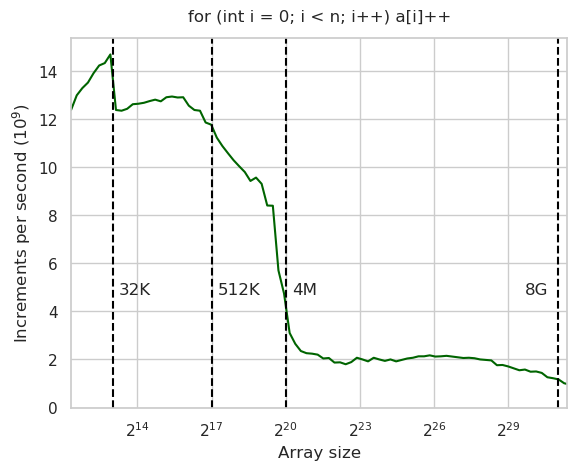

In [37]:
plt.plot(large_ns + rest_ns + [last_n], large_inc + rest_inc + [last_inc], color='darkgreen')

lines = [
    (2**13, "32K", 1.2),
    (2**17, "512K", 1.2),
    (2**20, "4M", 1.2),
    (2**31, "8G", 0.4),
]

for x, t, offs in lines:
    plt.text(x * offs, 4.7, t)
    plt.axvline(x=x, color='black', linestyle='--')

plt.xscale('log', basex=2)
plt.xlabel('Array size')

plt.ylabel('Increments per second ($10^9$)')

plt.title('for (int i = 0; i < n; i++) a[i]++', pad=12)

plt.ylim(bottom=0)
plt.margins(0)

fig = plt.gcf()
fig.savefig('large-inc.svg')

plt.show()

In [12]:
bench('inc', n=int(1.1 * 2**31), d=1)

inc 2362232012 1 1.18


1.18

In [9]:
int(1.1 * 2**30)

1181116006

In [8]:
bench('inc', n=int(1.1 * 2**30), d=1)

inc 1181116006 1 1.55


1.55

In [5]:
38+14.25*2

66.5

In [90]:
inc = [bench('inc', n=n, d=1) for n in ns]
sum = [bench('sum', n=n, d=1) for n in ns]
memset = [bench('memset', n=n, d=1) for n in ns]

inc 2566 1 12.34
inc 3002 1 13.01
inc 3512 1 13.34
inc 4110 1 13.43
inc 4808 1 13.92
inc 5626 1 14.19
inc 6582 1 14.28
inc 7701 1 14.62
inc 9011 1 12.35
inc 10543 1 12.33
inc 12335 1 12.42
inc 14432 1 12.59
inc 16885 1 12.59
inc 19756 1 12.61
inc 23115 1 12.7
inc 27044 1 12.84
inc 31642 1 12.81
inc 37021 1 12.9
inc 43315 1 12.93
inc 50678 1 12.91
inc 59293 1 12.92
inc 69373 1 12.49
inc 81167 1 12.58
inc 94965 1 12.73
inc 111110 1 12.36
inc 129998 1 11.8
inc 152098 1 11.33
inc 177955 1 10.77
inc 208207 1 10.7
inc 243603 1 10.29
inc 285015 1 10.09
inc 333468 1 10.04
inc 390158 1 9.56
inc 456485 1 9.59
inc 534087 1 9.19
inc 624882 1 7.83
inc 731112 1 6.55
inc 855401 1 4.78
inc 1000819 1 3.45
inc 1170959 1 2.47
inc 1370022 1 2.44
inc 1602925 1 2.19
inc 1875423 1 2.02
inc 2194245 1 2.06
inc 2567266 1 1.95
inc 3003702 1 1.97
inc 3514331 1 1.91
inc 4111767 1 1.91
inc 4810768 1 2.11
inc 5628599 1 2.17
sum 2566 1 12.21
sum 3002 1 12.71
sum 3512 1 13.24
sum 4110 1 13.31
sum 4808 1 13.75
sum 5626

In [186]:
# fix sum
sum = [bench('sum', n=n, d=1) for n in ns]

sum 2566 1 12.22
sum 3002 1 12.62
sum 3512 1 13.18
sum 4110 1 13.29
sum 4808 1 13.82
sum 5626 1 13.94
sum 6582 1 14.13
sum 7701 1 14.46
sum 9011 1 14.52
sum 10543 1 14.62
sum 12335 1 14.72
sum 14432 1 15.06
sum 16885 1 15.09
sum 19756 1 15.12
sum 23115 1 15.28
sum 27044 1 15.36
sum 31642 1 15.41
sum 37021 1 15.48
sum 43315 1 15.52
sum 50678 1 15.6
sum 59293 1 14.81
sum 69373 1 14.33
sum 81167 1 15.47
sum 94965 1 13.89
sum 111110 1 14.29
sum 129998 1 13.41
sum 152098 1 12.03
sum 177955 1 11.66
sum 208207 1 11.45
sum 243603 1 11.09
sum 285015 1 10.95
sum 333468 1 10.93
sum 390158 1 10.59
sum 456485 1 10.35
sum 534087 1 10.07
sum 624882 1 10.27
sum 731112 1 9.58
sum 855401 1 9.22
sum 1000819 1 7.27
sum 1170959 1 5.34
sum 1370022 1 4.43
sum 1602925 1 4.25
sum 1875423 1 3.77
sum 2194245 1 3.9
sum 2567266 1 3.69
sum 3003702 1 3.95
sum 3514331 1 3.93
sum 4111767 1 4.01
sum 4810768 1 4.34
sum 5628599 1 4.08


In [177]:
bench('sum-nt', n=2**27, d=1)
#bench('sum-nt', n=2**23, d=1)
#bench('sum', n=2**27, d=1)

ValueError: could not convert string to float: 'sum-nt.cc:'

In [187]:
#bench('memset-nt', n=2**27, d=1)
#bench('memset', n=2**25, d=1)
#nontemporal = 
nt = [bench('memset-nt', n=n, d=1) for n in ns]

memset-nt 2566 1 4.91
memset-nt 3002 1 4.87
memset-nt 3512 1 4.47
memset-nt 4110 1 5.79
memset-nt 4808 1 4.46
memset-nt 5626 1 4.33
memset-nt 6582 1 4.32
memset-nt 7701 1 4.77
memset-nt 9011 1 5.04
memset-nt 10543 1 4.91
memset-nt 12335 1 4.85
memset-nt 14432 1 5.47
memset-nt 16885 1 5.05
memset-nt 19756 1 5.39
memset-nt 23115 1 5.09
memset-nt 27044 1 5.04
memset-nt 31642 1 5.05
memset-nt 37021 1 5.36
memset-nt 43315 1 5.52
memset-nt 50678 1 5.35
memset-nt 59293 1 5.2
memset-nt 69373 1 5.09
memset-nt 81167 1 4.74
memset-nt 94965 1 5.45
memset-nt 111110 1 5.74
memset-nt 129998 1 5.54
memset-nt 152098 1 4.71
memset-nt 177955 1 5.58
memset-nt 208207 1 5.68
memset-nt 243603 1 5.12
memset-nt 285015 1 5.14
memset-nt 333468 1 5.24
memset-nt 390158 1 5.4
memset-nt 456485 1 5.68
memset-nt 534087 1 5.69
memset-nt 624882 1 5.56
memset-nt 731112 1 5.53
memset-nt 855401 1 5.87
memset-nt 1000819 1 5.49
memset-nt 1170959 1 5.06
memset-nt 1370022 1 6.04
memset-nt 1602925 1 5.63
memset-nt 1875423 1 5.6

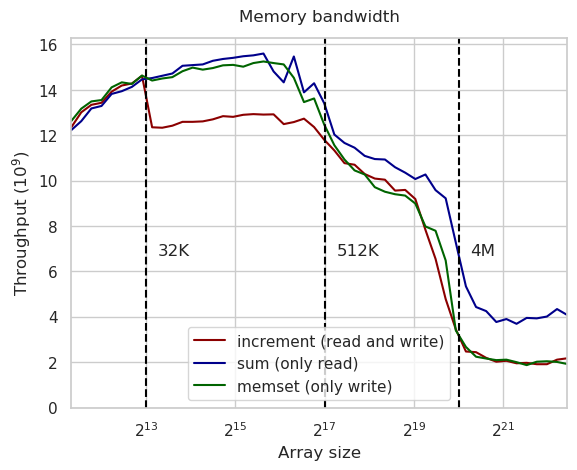

In [201]:
plt.plot(ns, inc, color='darkred', label='increment (read and write)')
plt.plot(ns, sum, color='darkblue', label='sum (only read)')
plt.plot(ns, memset, color='darkgreen', label='memset (only write)')

plot("Memory bandwidth", 'Throughput ($10^9$)', 'directional.svg', 6.7, True, loc='best')

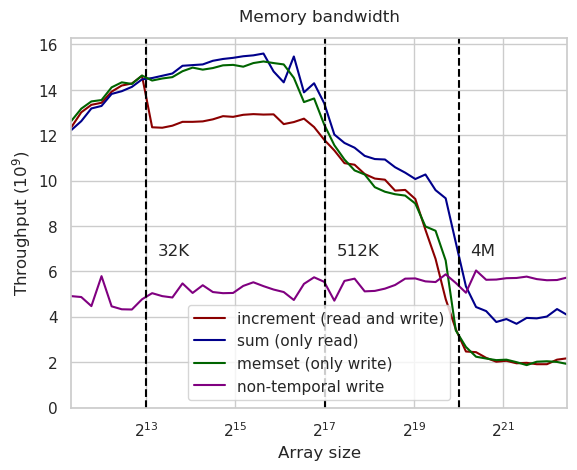

In [203]:
plt.plot(ns, inc, color='darkred', label='increment (read and write)')
plt.plot(ns, sum, color='darkblue', label='sum (only read)')
plt.plot(ns, memset, color='darkgreen', label='memset (only write)')
plt.plot(ns, nt, color='purple', label='non-temporal write')

plot("Memory bandwidth", 'Throughput ($10^9$)', 'non-temporal.svg', 6.7, True, loc='lower center')

In [ ]:
# Banks x Rows x Columns x Bits          16 x 16 x 10 x 64
# SDRAM Device Width                     8 bits
# Ranks                                  2
# 512M x16
# 4Banks 2BG
# 14.25

# 16?

In [58]:
large_ns = list(int(1.17**k) for k in range(50, 111))

In [61]:
p_sharing = [bench('permutation', n=n) for n in large_ns]

permutation 2566 1 3.15
permutation 3002 1 3.1
permutation 3512 1 3.11
permutation 4110 1 3.09
permutation 4808 1 3.02
permutation 5626 1 3.1
permutation 6582 1 3.1
permutation 7701 1 3.11
permutation 9011 1 3.56
permutation 10543 1 4.1
permutation 12335 1 4.48
permutation 14432 1 4.98
permutation 16885 1 5.28
permutation 19756 1 5.59
permutation 23115 1 5.93
permutation 27044 1 6.1
permutation 31642 1 6.33
permutation 37021 1 6.35
permutation 43315 1 6.53
permutation 50678 1 6.56
permutation 59293 1 7.05
permutation 69373 1 7.05
permutation 81167 1 8.6
permutation 94965 1 8.59
permutation 111110 1 8.53
permutation 129998 1 11.6
permutation 152098 1 14.25
permutation 177955 1 16.23
permutation 208207 1 19.37
permutation 243603 1 22.06
permutation 285015 1 25.68
permutation 333468 1 28.82
permutation 390158 1 37.03
permutation 456485 1 42.5
permutation 534087 1 44.31
permutation 624882 1 50.61
permutation 731112 1 61.03
permutation 855401 1 58.49
permutation 1000819 1 58.23
permutation 

In [62]:
p_padded = [bench('permutation-padded-simple', n=n) for n in large_ns]

permutation-padded-simple 2566 1 3.14
permutation-padded-simple 3002 1 3.14
permutation-padded-simple 3512 1 3.02
permutation-padded-simple 4110 1 3.28
permutation-padded-simple 4808 1 3.06
permutation-padded-simple 5626 1 3.12
permutation-padded-simple 6582 1 3.11
permutation-padded-simple 7701 1 3.05
permutation-padded-simple 9011 1 4.41
permutation-padded-simple 10543 1 5.07
permutation-padded-simple 12335 1 5.74
permutation-padded-simple 14432 1 6.0
permutation-padded-simple 16885 1 6.37
permutation-padded-simple 19756 1 6.57
permutation-padded-simple 23115 1 6.79
permutation-padded-simple 27044 1 6.9
permutation-padded-simple 31642 1 6.91
permutation-padded-simple 37021 1 7.01
permutation-padded-simple 43315 1 7.07
permutation-padded-simple 50678 1 7.12
permutation-padded-simple 59293 1 7.27
permutation-padded-simple 69373 1 7.38
permutation-padded-simple 81167 1 7.99
permutation-padded-simple 94965 1 12.29
permutation-padded-simple 111110 1 11.01
permutation-padded-simple 129998 

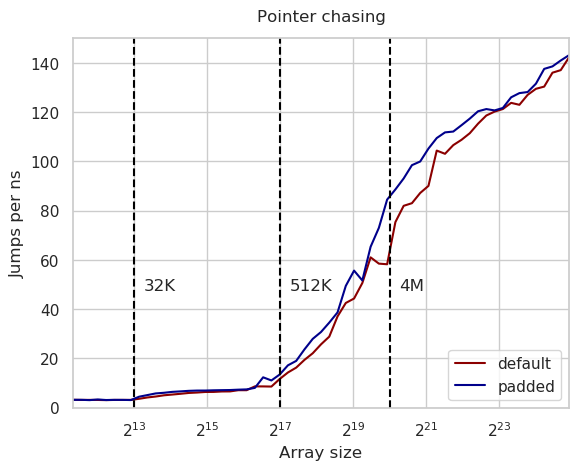

In [75]:
plt.plot(large_ns, p_sharing, color='darkred', label='default')
plt.plot(large_ns, p_padded, color='darkblue', label='padded')
plot("Pointer chasing", "Jumps per ns", "padded.svg", 47.5, True)

In [182]:
[bench('permutation-aos', n=2**23, d=d) for d in [128]]

permutation-aos 65536 128 26.67


[26.67]

In [181]:
[bench('permutation-simultaneous', n=2**23, d=d) for d in [128]]

permutation-simultaneous 65536 128 339.77


[339.77]

In [76]:
ds = list(range(1, 65))
aos = [bench('permutation-aos', n=2**23, d=d) for d in ds]
soa = [bench('permutation-simultaneous', n=2**23, d=d) for d in ds]

permutation-aos 8388608 1 119.14
permutation-aos 8388608 2 120.23
permutation-aos 8388608 3 127.63
permutation-aos 8388608 4 122.74
permutation-aos 8388608 5 127.6
permutation-aos 8388608 6 128.33
permutation-aos 8388608 7 132.78
permutation-aos 8388608 8 126.49
permutation-aos 8388608 9 135.15
permutation-aos 8388608 10 134.8
permutation-aos 8388608 11 138.52
permutation-aos 8388608 12 141.37
permutation-aos 8388608 13 139.21
permutation-aos 8388608 14 137.68
permutation-aos 8388608 15 142.54
permutation-aos 8388608 16 130.3
permutation-aos 8388608 17 152.77
permutation-aos 8388608 18 155.3
permutation-aos 8388608 19 156.97
permutation-aos 8388608 20 156.14
permutation-aos 8388608 21 161.05
permutation-aos 8388608 22 160.58
permutation-aos 8388608 23 167.78
permutation-aos 8388608 24 152.05
permutation-aos 8388608 25 161.14
permutation-aos 8388608 26 165.37
permutation-aos 8388608 27 185.08
permutation-aos 8388608 28 179.16
permutation-aos 8388608 29 167.47
permutation-aos 8388608 30 

In [77]:
import pickle

with open('aos-soa.pkl', 'wb') as f:
    pickle.dump([aos, soa], f)

In [ ]:
# shouldn't have used a power of two
def fixed(l):
    c = [x for x in l[-1]]
    for k in [16, 32, 48]:
        c[k] = (c[k - 1] + c[k + 1]) / 2
    return c    

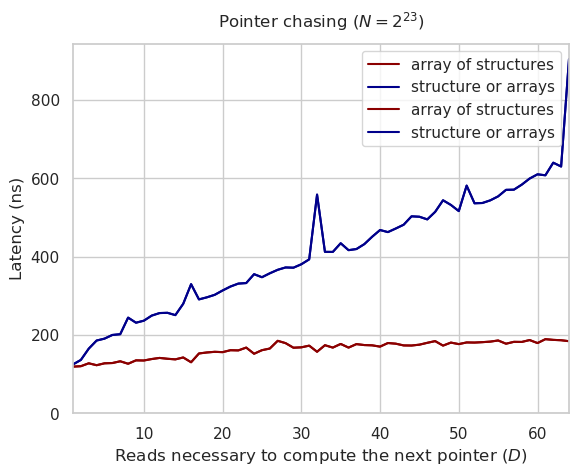

In [88]:
plt.plot(ds, aos, color='darkred', label='array of structures')
plt.plot(ds, soa, color='darkblue', label='structure or arrays')

plt.title("Pointer chasing ($N = 2^{23}$)", pad=12)

#plt.xticks(ds[1::2])

plt.xlabel('Reads necessary to compute the next pointer ($D$)')
plt.ylabel('Latency (ns)')

plt.legend(loc='best')

plt.ylim(bottom=0)
plt.margins(0)

fig = plt.gcf()
fig.savefig('aos-soa.svg')
plt.show()

In [39]:
[bench('permutation-simultaneous', n=2**23, d=d) for d in [1, 17, 50, 100]]

permutation-simultaneous 8388608 1 120.66
permutation-simultaneous 8388608 17 287.35
permutation-simultaneous 8388608 50 545.65
permutation-simultaneous 8388608 100 888.29


[120.66, 287.35, 545.65, 888.29]

In [51]:
[bench('permutation-padded', n=2**18, d=d) for d in [1, 2, 3, 4]]
# wtf?

permutation-padded 262144 1 29.22
permutation-padded 262144 2 33.86
permutation-padded 262144 3 29.36
permutation-padded 262144 4 32.5


[29.22, 33.86, 29.36, 32.5]

In [60]:
bench('permutation', n=2**18)

permutation 262144 1 24.46


24.46

In [65]:
[bench('permutation-nonlocal', n=2**24, d=d) for d in [1, 16, 1024]]
# wtf?

permutation-nonlocal 16777216 1 128.57
permutation-nonlocal 16777216 16 130.13
permutation-nonlocal 16777216 1024 124.92


[128.57, 130.13, 124.92]

In [78]:
[bench('permutation-nonlocal2', n=2**24, d=d) for d in [16, 2**9, 2**10, 2**11, 2**12, 2**15]]

permutation-nonlocal2 16777216 16 132.33
permutation-nonlocal2 16777216 512 125.0
permutation-nonlocal2 16777216 1024 130.53
permutation-nonlocal2 16777216 2048 125.24
permutation-nonlocal2 16777216 4096 124.67
permutation-nonlocal2 16777216 32768 129.08


[132.33, 125.0, 130.53, 125.24, 124.67, 129.08]

In [76]:
[bench('hw-prefetch', n=2**24, d=d) for d in [2**18]]

hw-prefetch 16777216 262144 25.26


[25.26]

In [15]:
aos = [bench('permutation-aos', n) for n in ns]

permutation-aos 2566 1 3.52
permutation-aos 3002 1 3.52
permutation-aos 3512 1 3.63
permutation-aos 4110 1 3.61
permutation-aos 4808 1 4.31
permutation-aos 5626 1 4.76
permutation-aos 6582 1 5.29
permutation-aos 7701 1 5.69
permutation-aos 9011 1 6.03
permutation-aos 10543 1 6.25
permutation-aos 12335 1 6.49
permutation-aos 14432 1 6.71
permutation-aos 16885 1 6.81
permutation-aos 19756 1 6.91
permutation-aos 23115 1 7.05
permutation-aos 27044 1 7.31
permutation-aos 31642 1 7.11
permutation-aos 37021 1 7.66
permutation-aos 43315 1 8.57
permutation-aos 50678 1 9.06
permutation-aos 59293 1 11.69
permutation-aos 69373 1 11.36
permutation-aos 81167 1 15.23
permutation-aos 94965 1 17.9
permutation-aos 111110 1 19.67
permutation-aos 129998 1 24.01
permutation-aos 152098 1 30.9
permutation-aos 177955 1 33.13
permutation-aos 208207 1 41.97
permutation-aos 243603 1 44.93
permutation-aos 285015 1 53.83
permutation-aos 333468 1 56.59
permutation-aos 390158 1 65.38
permutation-aos 456485 1 68.79
p

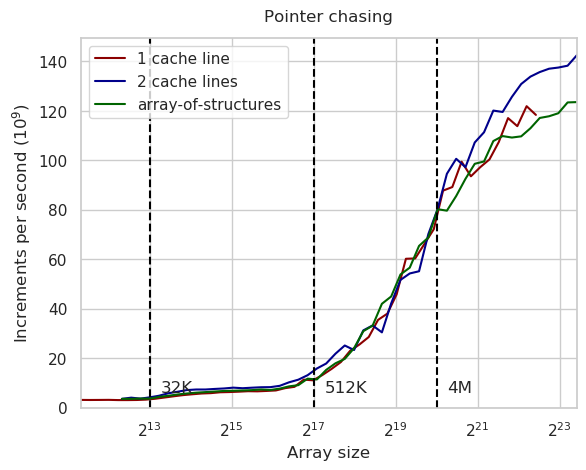

In [16]:
# array size accounting for double memory usage
plt.plot(ns, p1, color='darkred', label='1 cache line')
plt.plot([2 * n for n in ns], p2, color='darkblue', label='2 cache lines')
plt.plot([2 * n for n in ns], aos, color='darkgreen', label='array-of-structures')
plot('Pointer chasing', 'Increments per second ($10^9$)', 'permutation2.svg', 6.2, legend=True)

In [22]:
ds = list(range(1, 26))

In [34]:
mlp12 = [1 / bench('permutation-mlp', n=2**12, d=d) for d in ds]
mlp15 = [1 / bench('permutation-mlp', n=2**15, d=d) for d in ds]
mlp18 = [1 / bench('permutation-mlp', n=2**18, d=d) for d in ds]

permutation-mlp 4096 1 3.03
permutation-mlp 4096 2 1.51
permutation-mlp 4096 3 1.03
permutation-mlp 4096 4 0.77
permutation-mlp 4096 5 0.61
permutation-mlp 4096 6 0.52
permutation-mlp 4096 7 0.47
permutation-mlp 4096 8 0.4
permutation-mlp 4096 9 0.38
permutation-mlp 4096 10 0.34
permutation-mlp 4096 11 0.31
permutation-mlp 4096 12 0.29
permutation-mlp 4096 13 0.3
permutation-mlp 4096 14 0.68
permutation-mlp 4096 15 0.48
permutation-mlp 4096 16 0.44
permutation-mlp 4096 17 0.36
permutation-mlp 4096 18 0.86
permutation-mlp 4096 19 0.85
permutation-mlp 4096 20 0.86
permutation-mlp 4096 21 0.86
permutation-mlp 4096 22 0.93
permutation-mlp 4096 23 0.84
permutation-mlp 4096 24 0.86
permutation-mlp 4096 25 0.87
permutation-mlp 32768 1 6.25
permutation-mlp 32768 2 3.2
permutation-mlp 32768 3 2.19
permutation-mlp 32768 4 1.74
permutation-mlp 32768 5 1.42
permutation-mlp 32768 6 1.31
permutation-mlp 32768 7 1.22
permutation-mlp 32768 8 1.1
permutation-mlp 32768 9 1.18
permutation-mlp 32768 10 1.

In [32]:
mlp24 = [1 / bench('permutation-mlp', n=2**24, d=d) for d in ds]

permutation-mlp 16777216 1 131.02
permutation-mlp 16777216 2 64.85
permutation-mlp 16777216 3 43.22
permutation-mlp 16777216 4 34.67
permutation-mlp 16777216 5 27.22
permutation-mlp 16777216 6 21.28
permutation-mlp 16777216 7 18.36
permutation-mlp 16777216 8 15.87
permutation-mlp 16777216 9 14.36
permutation-mlp 16777216 10 12.99
permutation-mlp 16777216 11 11.99
permutation-mlp 16777216 12 13.21
permutation-mlp 16777216 13 10.47
permutation-mlp 16777216 14 10.26
permutation-mlp 16777216 15 9.68
permutation-mlp 16777216 16 10.36
permutation-mlp 16777216 17 10.01
permutation-mlp 16777216 18 11.41
permutation-mlp 16777216 19 11.4
permutation-mlp 16777216 20 11.34
permutation-mlp 16777216 21 11.35
permutation-mlp 16777216 22 11.93
permutation-mlp 16777216 23 12.11
permutation-mlp 16777216 24 11.7
permutation-mlp 16777216 25 11.4


In [30]:
def normalize(l):
    return [x / l[0] for x in l]

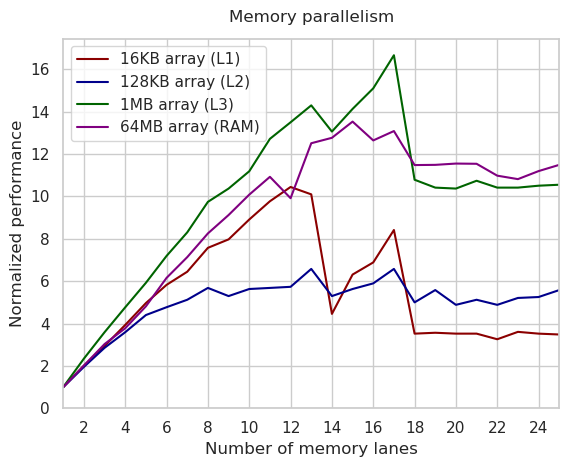

In [37]:
plt.plot(ds, normalize(mlp12), color='darkred', label="16KB array (L1)")
plt.plot(ds, normalize(mlp15), color='darkblue', label="128KB array (L2)")
plt.plot(ds, normalize(mlp18), color='darkgreen', label="1MB array (L3)")
plt.plot(ds, normalize(mlp24), color='purple', label="64MB array (RAM)")

plt.title("Memory parallelism", pad=12)

plt.xticks(ds[1::2])

plt.xlabel('Number of memory lanes')
plt.ylabel('Normalized performance')

plt.legend(loc='best')

plt.ylim(bottom=0)
plt.margins(0)

fig = plt.gcf()
fig.savefig('permutation-mlp.svg')
plt.show()